In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,14)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = qqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')
naa200r.data.sort_index(inplace=True)


naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')
naa200r.data.sort_index(inplace=True)


ndxa200r = ab.StockData('NDXA200R')
ndxa200r.get_data_from_csv('data/NDXA200R.csv')


spxa200r = ab.StockData('SPXA200R')
spxa200r.get_data_from_csv('data/SPXA200R.csv')
indicator = naa200r



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:

#buy and hold
bah = ab.BuyAndHold(ticker)
bah.run_strategy(ticker,sd,ed)
bah_bt = ab.BackTest(sd,ed)
bah_bt.run_backtest(bah,ticker,False)
bah_bt.performance_summary()
bah_bt.trade_records



Performance Summary of <Ab.StockData object at 0x00000194678D1840>: 
cumulative return      : 641.39%,
compound anual return  : 6.1784% 
max_drawdown           : -51.86%, 
sharp_ratio            : 3.30%, 
average of daily return: 0.0482%, 
std of daily return    : 1.4605%,
number of trades       : 2,
trading days           : 7742,
        
Betting Average  : 100.00%
Gain Average     : 641.39%
Loss Average     : nan%
Risk Reward Ratio: nan
Gain STD         : nan%
Loss STD         : nan%


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2002-01-02,2023-03-14 00:00:00,QQQ,0.024931,40.110001,297.369995,0.0,6.413862


In [3]:
naa200r_stg = ab.Threshold(signal_data = indicator, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
naa200r_stg.run_strategy(ticker, sd, ed)


In [4]:
naa200r_bt_weekly = ab.BackTest(sd,ed)
naa200r_bt_weekly.run_backtest(naa200r_stg, ticker, True,True)



Performance Summary of TH 15/30 MA 20: 
cumulative return      : 797.36%,
compound anual return  : 6.9265% 
max_drawdown           : -38.07%, 
sharp_ratio            : 4.11%, 
average of daily return: 0.0480%, 
std of daily return    : 1.1673%,
number of trades       : 33,
trading days           : 7742,
        
Betting Average  : 43.75%
Gain Average     : 28.92%
Loss Average     : -5.37%
Risk Reward Ratio: 5.39
Gain STD         : 29.55%
Loss STD         : 6.68%


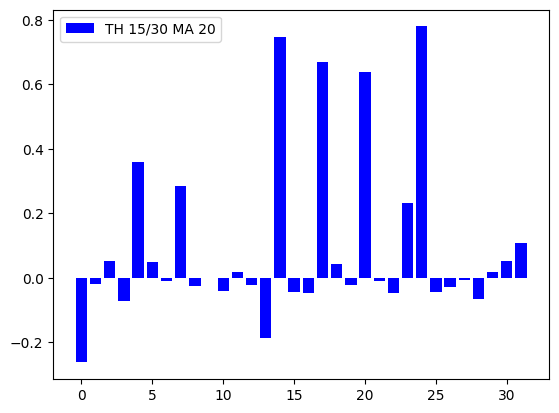

In [5]:
import matplotlib.pyplot as plt
plt.bar(naa200r_bt_weekly.trade_records.index, naa200r_bt_weekly.trade_records['Profit %'], label = naa200r_bt_weekly.name ,color = 'blue')
plt.legend()
plt.savefig('data/{}_naa200r_bt_weekly_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_weekly.trade_records.to_csv('data/{}_naa200r_bt_weekly_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_weekly.performance_summary()




In [6]:
naa200r_bt_daily = ab.BackTest(sd,ed)
naa200r_bt_daily.run_backtest(naa200r_stg, ticker)



Performance Summary of TH 15/30 MA 20: 
cumulative return      : 915.96%,
compound anual return  : 7.4059% 
max_drawdown           : -41.33%, 
sharp_ratio            : 4.45%, 
average of daily return: 0.0497%, 
std of daily return    : 1.1185%,
number of trades       : 52,
trading days           : 7742,
        
Betting Average  : 39.22%
Gain Average     : 21.85%
Loss Average     : -3.71%
Risk Reward Ratio: 5.89
Gain STD         : 27.74%
Loss STD         : 4.58%


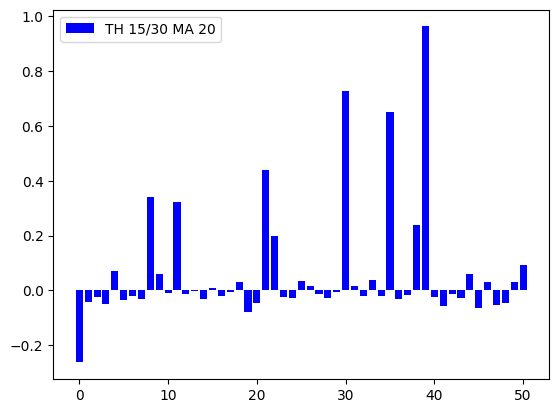

In [7]:
plt.bar(naa200r_bt_daily.trade_records.index, naa200r_bt_daily.trade_records['Profit %'], label = naa200r_bt_daily.name ,color = 'blue')
plt.legend()
plt.savefig('data/{}_naa200r_bt_daily_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.trade_records.to_csv('data/{}_naa200r_bt_daily_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.performance_summary()